In [29]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-customer-churn-modeling/Churn_Modelling.csv


In [3]:
df=pd.read_csv('/kaggle/input/bank-customer-churn-modeling/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df = df.drop(["RowNumber","CustomerId"],axis='columns')

In [5]:
df['Gender'].replace({'Female':0,'Male':1},inplace=True)
df.head()

/tmp/ipykernel_33/2018233744.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].replace({'Female':0,'Male':1},inplace=True)
/tmp/ipykernel_33/2018233744.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'].replace({'Female':0,'Male':1},inplace=True)


,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df['Surname'].unique().shape
df = df.drop('Surname',axis='columns')

In [7]:
df2 = pd.get_dummies(df,columns=['NumOfProducts','Geography'])
df2.head()

,CreditScore,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,101348.88,1,True,False,False,False,True,False,False
1,608,0,41,1,83807.86,0,1,112542.58,0,True,False,False,False,False,False,True
2,502,0,42,8,159660.80,1,0,113931.57,1,False,False,True,False,True,False,False
3,699,0,39,1,0.00,0,0,93826.63,0,False,True,False,False,True,False,False
4,850,0,43,2,125510.82,1,1,79084.10,0,True,False,False,False,False,False,True


In [8]:
df.shape

(10000, 11)

In [9]:
mean = np.mean(df['Balance'])
df['Balance'].replace(0.00,mean,inplace=True)
df

/tmp/ipykernel_33/1691281913.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Balance'].replace(0.00,mean,inplace=True)


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,76485.889288,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.860000,1,0,1,112542.58,0
2,502,France,0,42,8,159660.800000,3,1,0,113931.57,1
3,699,France,0,39,1,76485.889288,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.820000,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,1,39,5,76485.889288,2,1,0,96270.64,0
9996,516,France,1,35,10,57369.610000,1,1,1,101699.77,0
9997,709,France,0,36,7,76485.889288,1,0,1,42085.58,1
9998,772,Germany,1,42,3,75075.310000,2,1,0,92888.52,1


In [10]:
df2['Balance'] = df['Balance']

In [11]:
arr = df2['EstimatedSalary']
arr

0       101348.88
1       112542.58
2       113931.57
3        93826.63
4        79084.10
          ...    
9995     96270.64
9996    101699.77
9997     42085.58
9998     92888.52
9999     38190.78
Name: EstimatedSalary, Length: 10000, dtype: float64

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
cols = ['Age','CreditScore','EstimatedSalary','Balance']

df2[cols] = scaler.fit_transform(df2[cols])
df2.head()

,CreditScore,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,Geography_France,Geography_Germany,Geography_Spain
0,0.538,0,0.324324,2,0.294247,1,1,0.506735,1,True,False,False,False,True,False,False
1,0.516,0,0.310811,1,0.323876,0,1,0.562709,0,True,False,False,False,False,False,True
2,0.304,0,0.324324,8,0.630812,1,0,0.569654,1,False,False,True,False,True,False,False
3,0.698,0,0.283784,1,0.294247,0,0,0.469120,0,False,True,False,False,True,False,False
4,1.000,0,0.337838,2,0.492625,1,1,0.395400,0,True,False,False,False,False,False,True


In [13]:
X = df2.drop('Exited',axis="columns")
y = df2['Exited']

y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=5)
X_train

,CreditScore,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,Geography_France,Geography_Germany,Geography_Spain
7751,0.800,0,0.283784,6,0.294247,0,0,0.096273,False,True,False,False,False,False,True
4154,0.752,1,0.216216,3,0.294247,1,0,0.981478,False,True,False,False,True,False,False
3881,0.476,0,0.621622,3,0.294247,1,1,0.948551,True,False,False,False,True,False,False
9238,0.846,0,0.432432,4,0.294247,1,0,0.646869,False,True,False,False,True,False,False
5210,0.402,1,0.229730,7,0.509646,0,0,0.434670,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3046,0.616,0,0.175676,3,0.522942,0,1,0.731708,True,False,False,False,False,True,False
9917,0.570,1,0.472973,8,0.458209,0,1,0.618234,True,False,False,False,False,True,False
4079,0.466,0,0.175676,4,0.628052,1,0,0.062643,True,False,False,False,True,False,False
2254,0.658,1,0.243243,6,0.582549,0,1,0.862531,True,False,False,False,True,False,False


In [15]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(15,input_shape=(15,),activation='relu'),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

2024-07-06 17:02:10.226687: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-06 17:02:10.226849: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-06 17:02:10.417725: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7112 - loss: 0.5479
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8176 - loss: 0.4095
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8264 - loss: 0.3959
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8365 - loss: 0.3781
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8380 - loss: 0.3774
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8361 - loss: 0.3744
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8453 - loss: 0.3650
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8442 - loss: 0.3579
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8424 - loss: 0.3764
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8522 - loss: 0.3591
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8461 - loss: 0.3672
Epoch 12/100
250/250 ━━━━━━━━━━━━━━━━━━━━

In [24]:
y_preds = model.predict(X_test)
y_preds.round(2)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[0.05],
       [0.03],
       [0.07],
       ...,
       [0.03],
       [0.02],
       [0.05]], dtype=float32)

In [26]:
model.evaluate(X_test,y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8466 - loss: 0.3745


[0.36691582202911377, 0.8525000214576721]

Text(95.72222222222221, 0.5, 'Truth')

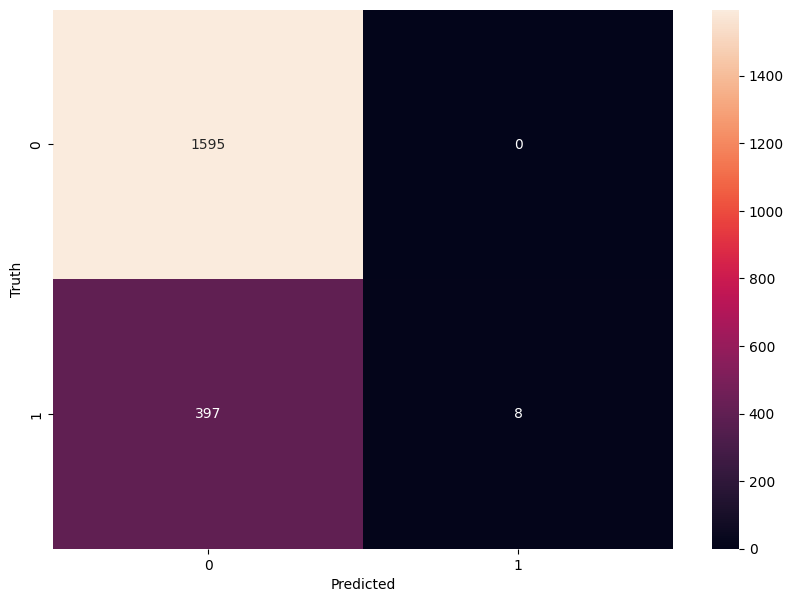

In [30]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_preds)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [31]:
y_test.value_counts()

Exited
0    1595
1     405
Name: count, dtype: int64